In [1]:
import numpy as np
import math
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
import seaborn as sns

In [2]:
df = pd.read_excel('витрина1.xlsx')

In [29]:
df

,КоличествоЧеков,СреднийЧек,СреднееЧислоТоваровЧека,Выручка,КоличествоТоваров,КоличествоЧековВыкупленные,СреднийЧекВыкупленные,СреднееЧислоТоваровЧекаВыкупленные,ВыручкаВыкупленная,КоличествоТоваровВыкупленные,...,Элитная техника,МО,Московский,Поволжье,Северный,Сибирский,Уральский,Центральный,Южный,Кластер
0,19,13159.714286,1.105263,209838,20,13,2234.076923,1.0,29043,13,...,0.0,0.0,0.846154,0.0,0.153846,0.0,0.0,0.0,0.0,0
1,1,54999.000000,1.000000,54999,1,1,54999.000000,1.0,54999,1,...,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,3
2,1,26599.000000,2.000000,26599,2,1,26599.000000,2.0,26599,2,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0
3,1,1590.000000,1.000000,1590,1,1,1590.000000,1.0,1590,1,...,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,2
4,1,26138.000000,3.000000,26138,3,1,26138.000000,3.0,26138,3,...,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132204,1,4040.000000,1.000000,3850,1,1,4040.000000,1.0,3850,1,...,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,2
132205,1,1370.000000,1.000000,1370,1,1,1370.000000,1.0,1370,1,...,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,2
132206,1,1999.000000,1.000000,1999,1,1,1999.000000,1.0,1999,1,...,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0
132207,3,4626.000000,1.000000,13878,3,2,6539.500000,1.0,13079,2,...,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0


<AxesSubplot:>

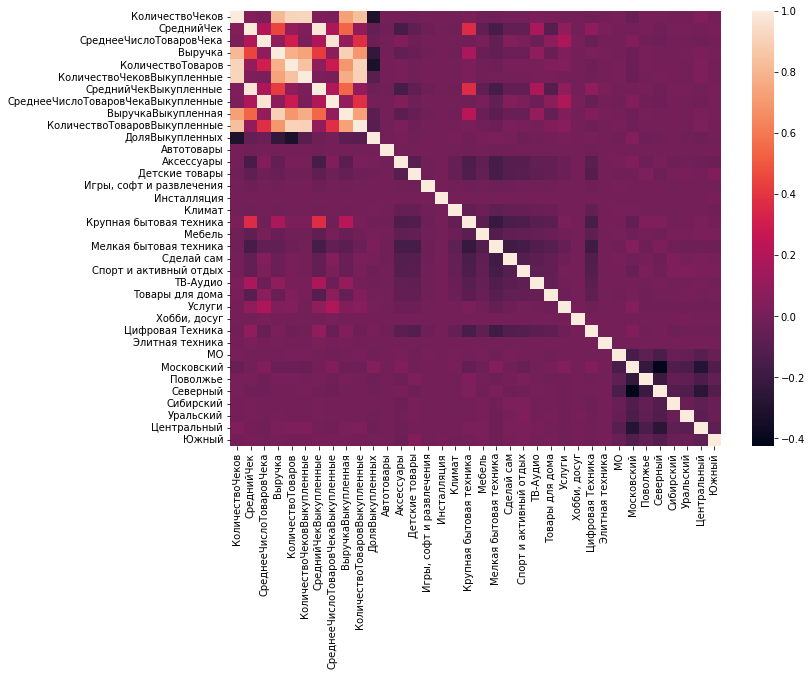

In [19]:
fig, ax = plt.subplots(figsize=(11,8))         # Sample figsize in inches
sns.heatmap(df.corr(), ax=ax)

In [20]:
df.corr()

,КоличествоЧеков,СреднийЧек,СреднееЧислоТоваровЧека,Выручка,КоличествоТоваров,КоличествоЧековВыкупленные,СреднийЧекВыкупленные,СреднееЧислоТоваровЧекаВыкупленные,ВыручкаВыкупленная,КоличествоТоваровВыкупленные,...,Цифровая Техника,Элитная техника,МО,Московский,Поволжье,Северный,Сибирский,Уральский,Центральный,Южный
КоличествоЧеков,1.000000,0.052162,0.024690,0.814144,0.911900,0.920703,0.037162,0.019890,0.726092,0.837751,...,-0.011339,-0.000173,0.006671,-0.042595,0.009683,0.006204,-0.000998,0.000557,0.034778,0.002202
СреднийЧек,0.052162,1.000000,0.190482,0.447331,0.105682,0.033226,0.980606,0.183005,0.541407,0.098682,...,0.088254,0.023085,-0.006209,-0.001613,0.007488,-0.008480,0.004522,0.004413,-0.000389,0.011441
СреднееЧислоТоваровЧека,0.024690,0.190482,1.000000,0.089907,0.306986,0.016269,0.183861,0.969430,0.101498,0.372194,...,-0.042316,0.000264,-0.006813,0.042101,-0.011544,-0.023378,0.003211,-0.002117,-0.014221,0.003987
Выручка,0.814144,0.447331,0.089907,1.000000,0.788319,0.735686,0.419379,0.079027,0.896288,0.696874,...,0.025939,0.007818,0.000854,-0.030848,0.010323,-0.000362,0.001583,0.004319,0.025580,0.005465
КоличествоТоваров,0.911900,0.105682,0.306986,0.788319,1.000000,0.845463,0.083929,0.287548,0.693119,0.908028,...,-0.024724,0.000378,0.004525,-0.032061,0.008746,0.000883,0.000848,-0.001032,0.029943,0.001827
КоличествоЧековВыкупленные,0.920703,0.033226,0.016269,0.735686,0.845463,1.000000,0.025291,0.012447,0.769628,0.902203,...,-0.011550,-0.000482,0.007089,-0.036957,0.003986,0.004346,-0.000037,-0.002357,0.036305,0.000482
СреднийЧекВыкупленные,0.037162,0.980606,0.183861,0.419379,0.083929,0.025291,1.000000,0.188304,0.547633,0.093288,...,0.090158,0.022171,-0.006853,0.000065,0.006395,-0.008518,0.004717,0.004334,-0.001419,0.011695
СреднееЧислоТоваровЧекаВыкупленные,0.019890,0.183005,0.969430,0.079027,0.287548,0.012447,0.188304,1.000000,0.100977,0.379326,...,-0.043134,-0.000876,-0.007250,0.042591,-0.012977,-0.022382,0.002743,-0.002914,-0.014264,0.004551
ВыручкаВыкупленная,0.726092,0.541407,0.101498,0.896288,0.693119,0.769628,0.547633,0.100977,1.000000,0.732079,...,0.038773,0.009424,-0.000734,-0.025624,0.006799,-0.003242,0.003002,0.002714,0.025894,0.006582
КоличествоТоваровВыкупленные,0.837751,0.098682,0.372194,0.696874,0.908028,0.902203,0.093288,0.379326,0.732079,1.000000,...,-0.028830,-0.000760,0.004250,-0.021746,0.000167,-0.002971,0.001387,-0.002725,0.029560,0.001445


## K-means segmentation

In [36]:
scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(df)

In [38]:
pca = PCA(0.95)
df_pca = pca.fit_transform(df_normalize)

In [47]:
df_scaled = scaler.fit_transform(df)

In [49]:
df_normalize = preprocessing.normalize(df_scaled)

In [39]:
pca.explained_variance_ratio_

array([0.11648732, 0.10162334, 0.08388744, 0.06641532, 0.0640904 ,
       0.05459022, 0.0525264 , 0.05081014, 0.04712061, 0.04599528,
       0.03629841, 0.03479845, 0.03113753, 0.0282286 , 0.02806073,
       0.02699114, 0.02422889, 0.02307205, 0.0229696 , 0.01982743])

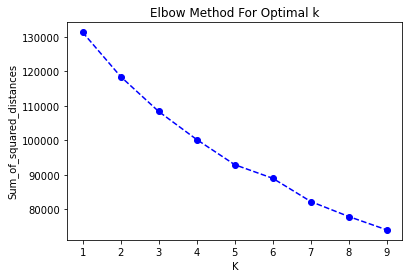

In [50]:
# Elbow method for selecting the optimal number of clusters
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_normalize)
    sum_of_squared_distances.append(kmeans.inertia_)
    
plt.plot(K, sum_of_squared_distances, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

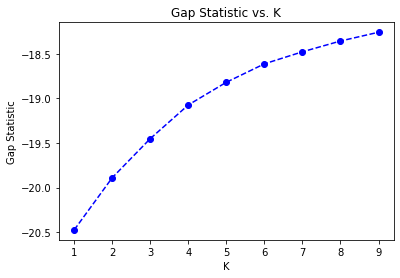

In [12]:
# Gap Statistic for selecting the optimal number of clusters
def optimalK_GAP(data, nrefs=3, maxClusters=15):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            randomReference = np.random.random_sample(size=data.shape)
            kmeans = KMeans(k).fit(randomReference)
            refDisp = kmeans.inertia_
            refDisps[i] = refDisp
        kmeans = KMeans(k).fit(data)
        origDisp = kmeans.inertia_
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)

score_g, df2 = optimalK_GAP(df, nrefs=3, maxClusters=10)
plt.plot(df2['clusterCount'], df2['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

In [106]:
kmeans = KMeans(n_clusters=5).fit(df_normalize)

In [107]:
y_kmeans = kmeans.predict(df_normalize)

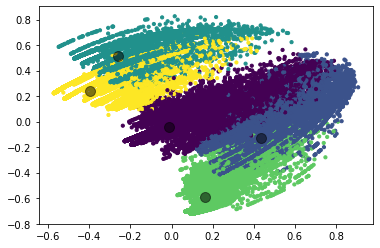

In [97]:
plt.scatter(df_normalize[:, 0], df_normalize[:, 1], c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);

In [109]:
df['Сегмент'] = kmeans.labels_

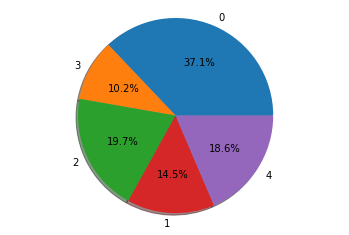

In [38]:
fig, ax = plt.subplots()
ax.pie(df.groupby(['Кластер']).count()['СреднийЧекВыкупленные'].to_list(), labels = df['Кластер'].unique(), autopct='%1.1f%%',
        shadow=True)
ax.axis('equal')
plt.show()

## DBSCAN segmentation

In [116]:
neighbors = NearestNeighbors(n_neighbors=100)
neighbors_fit = neighbors.fit(df_normalize)

In [370]:
distances, indices = neighbors_fit.kneighbors(df_normalize)

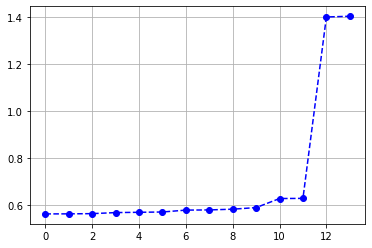

In [397]:
distances_sorted = np.sort(distances, axis=0)
distances_sorted = distances_sorted[:,1]
plt.plot(distances_sorted[132195:], linestyle='--', marker='o', color='b')
plt.grid()

In [398]:
distances

array([0.56385312, 0.56413583, 0.56500944, 0.5694737 , 0.5707628 ,
       0.57202516, 0.5800122 , 0.58077894, 0.58400873, 0.59070553,
       0.62921904, 0.6298609 , 1.40058041, 1.40368464])

In [126]:
db = DBSCAN(eps=0.6, min_samples=20).fit(df_normalize)

In [127]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df_normalize, labels))

Estimated number of clusters: 2
Estimated number of noise points: 9


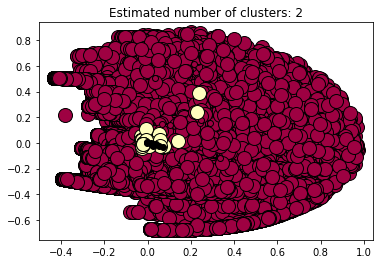

In [128]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df_normalize[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=14)

    xy = df_normalize[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [129]:
df['Сегмент'] = db.labels_

In [131]:
df.groupby(['Сегмент']).count()['СреднийЧекВыкупленные'].to_list()

[9, 132129, 71]